# Chapter 10. 시계열 분석

### 1. MarketWatch 자료 받고 확인

- https://www.marketwatch.com/investing/index/spx/download-data

MarketWatch는 주식, 금융, 경제 뉴스와 데이터를 제공하는 금융 미디어 웹사이트다. 이 사이트는 투자자, 트레이더, 재정 전문가들을 대상으로 최신 시장 동향, 금융 뉴스, 주식 및 상품 가격 정보, 금융 지표, 경제 전망 등을 제공한다.

주요 특징은 다음과 같다:

1. **시장 데이터**: 실시간 주식, 채권, 상품, 외환 시장의 데이터를 제공하며, 개별 종목의 상세 정보(차트, 재무제표, 기업 분석 등)를 확인할 수 있다.

2. **뉴스**: 경제 및 금융과 관련된 최신 뉴스를 다루며, 기업 실적 발표, 경제 정책 변화, 글로벌 금융 시장 동향 등을 분석한다.

3. **도구 및 리소스**: 투자 및 금융 계획을 돕기 위한 다양한 도구(포트폴리오 관리, 주식 스크리너 등)를 제공해 재정 계획을 세우는 데 필요한 정보를 쉽게 접근할 수 있다.

4. **칼럼 및 분석**: 유명 경제학자와 금융 전문가들의 칼럼과 분석 기사를 통해 독자들은 깊이 있는 금융 및 경제 지식을 얻을 수 있다.

5. **커뮤니티 및 의견 공유**: 투자자들 간의 의견 교환과 토론이 가능한 게시판과 댓글 시스템도 갖추고 있어, 다양한 시각을 접할 수 있다.

MarketWatch는 특히 미국 및 글로벌 주식 시장에 대한 정보를 신속하고 정확하게 제공하여, 투자 결정을 내리는 데 필요한 자료를 제공한다.

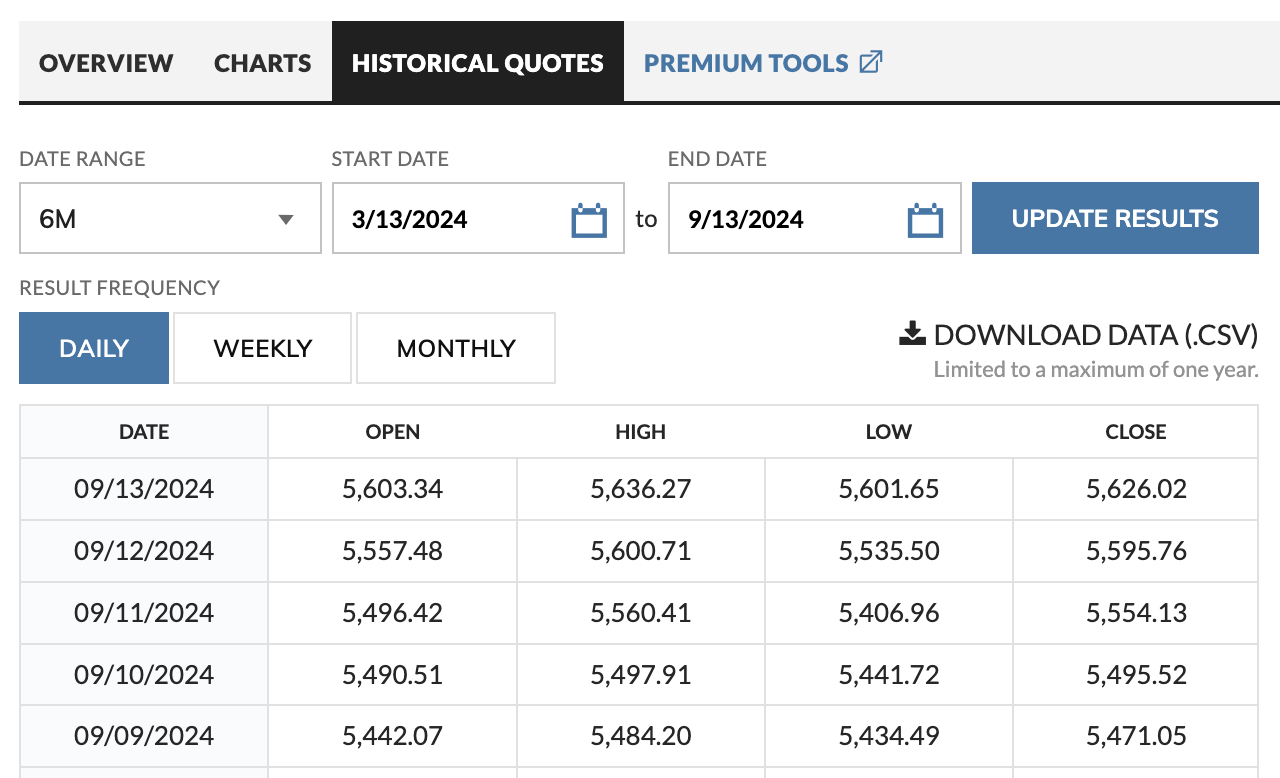

In [1]:
import pandas as pd
df = pd.read_csv('./data/INDEX_US.csv')
df.head()

,Date,Open,High,Low,Close
0,09/13/2024,"5,603.34","5,636.27","5,601.65","5,626.02"
1,09/12/2024,"5,557.48","5,600.71","5,535.50","5,595.76"
2,09/11/2024,"5,496.42","5,560.41","5,406.96","5,554.13"
3,09/10/2024,"5,490.51","5,497.91","5,441.72","5,495.52"
4,09/09/2024,"5,442.07","5,484.20","5,434.49","5,471.05"


In [2]:
df.describe()

,Date,Open,High,Low,Close
count,128,128,128,128,128
unique,128,128,128,127,128
top,09/13/2024,"5,603.34","5,636.27","5,560.95","5,626.02"
freq,1,1,1,2,1


In [3]:
df.dtypes

Date     object
Open     object
High     object
Low      object
Close    object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    128 non-null    object
 1   Open    128 non-null    object
 2   High    128 non-null    object
 3   Low     128 non-null    object
 4   Close   128 non-null    object
dtypes: object(5)
memory usage: 5.1+ KB


#### 무엇이 문제인가?
1. Date 열이 날짜 데이터타입이 아닌 object 타입으로 되어 있다.
2. 나머지 주가를 나타내는 열이 실수가 아닌 object 타입으로 되어 있다.
3. 순서가 날짜 역순으로 되어 있다.

**데이터 분석을 하기 위해서는 먼저 데이터 변환 및 정제가 필요**

### 2. 날짜, 시간 자료형 다루기

관련 모듈: datetime, date, time, calendar

In [5]:
from datetime import datetime, timedelta

now = datetime.now()
print(now) #현재 날짜와 시간을 마이크로초까지 저장

date1 = datetime(2023, 10, 1, 13, 30)
print(date1.year, date1.month, date1.day, date1.hour, date1.minute)

#시간 차이 연산
d = now - date1  #timedelta 타입으로 저장됨
print(type(d), d)
print(date1 + timedelta(days=100)) #100일 후

2024-12-04 13:51:39.807729
2023 10 1 13 30
<class 'datetime.timedelta'> 430 days, 0:21:39.807729
2024-01-09 13:30:00


strftime: datetime을 문자열로 변환<br>
strptime: 문자열을 datetime으로 변환

- %y : 두 자리 수의 연도 ex) 19, 20, 21
- %Y : 네 자리 수의 연도 ex) 2019, 2020, 2021
- %m : 0을 채운 두 자리 수의 월 ex) 01, 02 ...  11 ,12
- %d : 0을 채운 두 자리 수의 일 ex) 01, 02 ...  30, 31
- %I : 0을 채운 12시간제의 시간 ex) 01, 02 … 12
- %H : 0을 채운 24시간제의 시간 ex) 00, 01 … 23
- %M : 0을 채운 두 자리 수의 분 ex) 00, 01 ... 58, 59
- %S : 0을 채운 두 자리 수의 초 ex) 00, 01 ... 58, 59

https://docs.python.org/ko/3/library/datetime.html#strftime-strptime-behavior

In [6]:
print(str(now))
print(now.strftime("%Y/%m/%d"))

print(datetime.strptime("240301", "%y%m%d"))

2024-12-04 13:51:39.807729
2024/12/04
2024-03-01 00:00:00


### 3. Pandas 변환함수

#### 3.1 날짜 변환

pd.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)

- arg: 변환 대상
- format: 문자열의 datetime 포맷 지정

In [7]:
#pd.to_datetime(df['Date'], format='%m/%d/%Y')
pd.to_datetime(df['Date']) #포맷을 지정하지 않아도 적당히 알아서 해줌

0     2024-09-13
1     2024-09-12
2     2024-09-11
3     2024-09-10
4     2024-09-09
         ...    
123   2024-03-19
124   2024-03-18
125   2024-03-15
126   2024-03-14
127   2024-03-13
Name: Date, Length: 128, dtype: datetime64[ns]

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

#### 3.2 문자열 변환: pandas replace와 string replace

- 목표
    - "5,603.34"와 같은 형태의 값을 실수 타입으로 변경
    - 바로 실수로 변경하면 ',' 때문에 에러가 발생
    - ','를 먼저 없애고 난 후에 실수로 변경

- pandas replace
    - 간단사용법: df.replace(현재값, 대체값)
    - 데이터 프레임 내에서 특정 값을 찾아 대체하고 싶을 때 사용
    - 문자열뿐만 아니라 모든 타입의 값이 가능
    - 문법: df.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
        - to_replace : 변경전 값
        - value : 변경될 값
        - inplace : 원본의 변경 여부

- string replace
    - 문자열인 특정 컬럼의 값 내부에서 패턴을 찾아 대체하고 싶을 때 사용
    - df['column'].str.replace('찾을 문자열', '대체 문자열')

In [9]:
df['Open'].str.replace(',', '').astype('float')

0      5603.34
1      5557.48
2      5496.42
3      5490.51
4      5442.07
        ...   
123    5139.09
124    5154.77
125    5123.31
126    5175.14
127    5173.49
Name: Open, Length: 128, dtype: float64

#### 3.3 열의 데이터 타입 변환

In [10]:
df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close']

In [11]:
for col in ['Open', 'High', 'Low', 'Close']:
    df[col] = df[col].str.replace(',', '').astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    128 non-null    datetime64[ns]
 1   Open    128 non-null    float64       
 2   High    128 non-null    float64       
 3   Low     128 non-null    float64       
 4   Close   128 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.1 KB


In [13]:
df.head()

,Date,Open,High,Low,Close
0,2024-09-13,5603.34,5636.27,5601.65,5626.02
1,2024-09-12,5557.48,5600.71,5535.50,5595.76
2,2024-09-11,5496.42,5560.41,5406.96,5554.13
3,2024-09-10,5490.51,5497.91,5441.72,5495.52
4,2024-09-09,5442.07,5484.20,5434.49,5471.05


In [14]:
df.describe()

,Date,Open,High,Low,Close
count,128,128.000000,128.000000,128.000000,128.000000
mean,2024-06-13 06:56:15,5352.225547,5377.135234,5324.446484,5351.432422
min,2024-03-13 00:00:00,4987.330000,5019.020000,4953.560000,4967.230000
25%,2024-04-28 06:00:00,5205.887500,5228.110000,5183.140000,5205.442500
50%,2024-06-12 12:00:00,5340.740000,5360.510000,5302.215000,5345.475000
75%,2024-07-30 06:00:00,5506.050000,5546.247500,5473.625000,5506.002500
max,2024-09-13 00:00:00,5644.090000,5669.670000,5639.020000,5667.200000
std,NaN,182.955171,183.516549,182.856929,184.310278


#### 날짜 순으로 정렬하고 인덱스 수정

In [15]:
df = df.sort_values(by='Date' ,ascending=True)
df.head()

,Date,Open,High,Low,Close
127,2024-03-13,5173.49,5179.14,5151.88,5165.31
126,2024-03-14,5175.14,5176.85,5123.30,5150.48
125,2024-03-15,5123.31,5136.86,5104.35,5117.09
124,2024-03-18,5154.77,5175.60,5145.47,5149.42
123,2024-03-19,5139.09,5180.31,5131.59,5178.51


In [16]:
df.reset_index().head()

,index,Date,Open,High,Low,Close
0,127,2024-03-13,5173.49,5179.14,5151.88,5165.31
1,126,2024-03-14,5175.14,5176.85,5123.30,5150.48
2,125,2024-03-15,5123.31,5136.86,5104.35,5117.09
3,124,2024-03-18,5154.77,5175.60,5145.47,5149.42
4,123,2024-03-19,5139.09,5180.31,5131.59,5178.51


In [17]:
# 기존 인덱스를 없애기 위해서 drop=True 설정
df = df.reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close
0,2024-03-13,5173.49,5179.14,5151.88,5165.31
1,2024-03-14,5175.14,5176.85,5123.30,5150.48
2,2024-03-15,5123.31,5136.86,5104.35,5117.09
3,2024-03-18,5154.77,5175.60,5145.47,5149.42
4,2024-03-19,5139.09,5180.31,5131.59,5178.51


#### 3.4 Datetime을 index로 설정하면 좋은 이유

- 각 열에 대해 datetime으로 인덱싱 및 슬라이싱 등을 쉽게 할 수 있음
- 이 때 datetime type이 아닌 문자열로도 가능. 즉 문자열을 datetime으로 변환해서 indexing하지 않아도 됨
- 물론 datetime type으로도 가능

In [18]:
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close
Date,,,,
2024-03-13,5173.49,5179.14,5151.88,5165.31
2024-03-14,5175.14,5176.85,5123.30,5150.48
2024-03-15,5123.31,5136.86,5104.35,5117.09
2024-03-18,5154.77,5175.60,5145.47,5149.42
2024-03-19,5139.09,5180.31,5131.59,5178.51
...,...,...,...,...
2024-09-09,5442.07,5484.20,5434.49,5471.05
2024-09-10,5490.51,5497.91,5441.72,5495.52
2024-09-11,5496.42,5560.41,5406.96,5554.13


In [19]:
print(df.Open['2024-03-20'])  #2024-03-13 날짜의 Open 값
print(df.Open['2024-03-20':'2024-04-10']) #슬라이싱

5181.69
Date
2024-03-20    5181.69
2024-03-21    5253.43
2024-03-22    5242.48
2024-03-25    5219.52
2024-03-26    5228.85
2024-03-27    5226.31
2024-03-28    5248.03
2024-04-01    5257.97
2024-04-02    5204.29
2024-04-03    5194.37
2024-04-04    5244.05
2024-04-05    5158.95
2024-04-08    5211.37
2024-04-09    5217.03
2024-04-10    5167.88
Name: Open, dtype: float64


### 4. 데이터 시프트
- shift(): 주어진 수만큼 시계열을 시프트

In [20]:
df.Open.shift(1)

Date
2024-03-13        NaN
2024-03-14    5173.49
2024-03-15    5175.14
2024-03-18    5123.31
2024-03-19    5154.77
               ...   
2024-09-09    5507.33
2024-09-10    5442.07
2024-09-11    5490.51
2024-09-12    5496.42
2024-09-13    5557.48
Name: Open, Length: 128, dtype: float64

#### shift를 이용해서 변화율(증감율)을 쉽게 구하는 방법

- shift(1)을 하면 전날의 값을 나타냄 
- 예를 들어 위 예에서 2024-03-13의 원래 값은 5173.49이고 shift를 하면 이 값이 14일로 이동
- 따라서 14일 관점에서 shift값은 전날 즉 13일의 값
- 14일의 원래 값을 shift값으로 나누면 전날 대비 변화율이 됨
- 이 값이 1이면 변동이 없고, 1보다 작으면 감소, 1보다 크면 증가
- 이 값에서 1을 빼면 변화율이 됨

In [21]:
df.Open / df.Open.shift(1) - 1

Date
2024-03-13         NaN
2024-03-14    0.000319
2024-03-15   -0.010015
2024-03-18    0.006141
2024-03-19   -0.003042
                ...   
2024-09-09   -0.011850
2024-09-10    0.008901
2024-09-11    0.001076
2024-09-12    0.011109
2024-09-13    0.008252
Name: Open, Length: 128, dtype: float64

### 5. 주식 데이터는 어떻게 만들어졌을까? : resample(), olhc()

OHLC 샘플링
- 일정한 시간 간격으로 Open(시가)), High(고가)), Low(저가), Close(종가)를 구함
- 주가는 일별로 계산
- resample()과 ohlc()를 이용해 구할 수 있음

pandas.date_range(): 일정한 날짜/시간 시계열 생성
```
pandas.date_range( 
    start=None,         #날짜를 생성하기 위한 시작
    end=None,           #날짜를 생성하기 위한 끝
    periods=None,       #생성하려는 날짜의 개수
    freq=None,          #생성하려는 날짜들의 간격(주기), M:month, W:week, D:day, h:hour, min:minute, s:second
    closed=None, )      #시작과 끝 날짜로 지정한 값의 포함 여부
```

DataFrame.resample(): 날짜/시간 시계열을 원하는 주기로 나누어줌. groupby()와 유사
- 이후 sum() 등의 함수를 통해 주기 별로 통계 계산

ohlc(): Open(시가)), High(고가)), Low(저가), Close(종가) 계산
- resample()과 함께 사용되어 주기별로 네 개의 값을 계산한 후 DataFrame을 반환 


In [22]:
#4시간 간격으로 날짜/시간 데이터 60개 생성 - 하루 당 6개
dates = pd.date_range("2024-01-01", periods=60, freq='4h')
dates[:12]

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 04:00:00',
               '2024-01-01 08:00:00', '2024-01-01 12:00:00',
               '2024-01-01 16:00:00', '2024-01-01 20:00:00',
               '2024-01-02 00:00:00', '2024-01-02 04:00:00',
               '2024-01-02 08:00:00', '2024-01-02 12:00:00',
               '2024-01-02 16:00:00', '2024-01-02 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [23]:
import numpy as np
time_50min_data = pd.Series(np.random.randint(1, 100, 60), index=dates)
time_50min_data[:12]

2024-01-01 00:00:00    69
2024-01-01 04:00:00    62
2024-01-01 08:00:00    73
2024-01-01 12:00:00    22
2024-01-01 16:00:00    53
2024-01-01 20:00:00     4
2024-01-02 00:00:00    64
2024-01-02 04:00:00    67
2024-01-02 08:00:00    53
2024-01-02 12:00:00    86
2024-01-02 16:00:00    95
2024-01-02 20:00:00    27
Freq: 4h, dtype: int32

In [24]:
time_50min_data.resample('D').ohlc()

,open,high,low,close
2024-01-01,69,73,4,4
2024-01-02,64,95,27,27
2024-01-03,1,83,1,9
2024-01-04,14,95,14,27
2024-01-05,43,86,1,60
2024-01-06,48,93,17,67
2024-01-07,54,99,3,99
2024-01-08,77,85,15,15
2024-01-09,50,89,12,75
2024-01-10,28,80,26,26


### 6. 이동 창(moving window) 함수와 그래프 그리기

In [25]:
#필요한 패키지를 import
import matplotlib.pyplot as plt

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()   #윈도우
#font_name = 'AppleGothic'  #맥 OS 
rc('font', family=font_name) 			

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

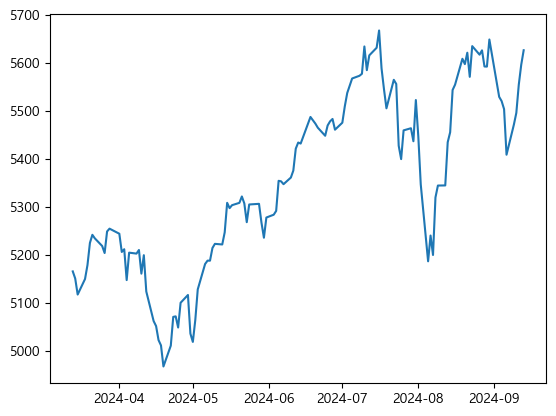

In [26]:
plt.plot(df.index, df.Close)
plt.show()

#### 6.1 pandas.DataFrame.plot()
- https://pandas.pydata.org/pandas-docs/version/0.19.1/generated/pandas.DataFrame.plot.html

*parameters*

- x : label or position, default None
- y : label or position, default None
- kind : str
    - ‘line’ : line plot (default)
    - ‘bar’ : vertical bar plot
    - ‘barh’ : horizontal bar plot
    - ‘hist’ : histogram
    - ‘box’ : boxplot
    - ‘kde’ : Kernel Density Estimation plot
    - ‘density’ : same as ‘kde’
    - ‘area’ : area plot
    - ‘pie’ : pie plot
    - ‘scatter’ : scatter plot
    - ‘hexbin’ : hexbin plot
- figsize : a tuple (width, height) in inches
- title : string
- legend : False/True/’reverse’
- style : list or dict, matplotlib line style per column
- xticks : sequence
- yticks : sequence
- xlim : 2-tuple/list
- ylim : 2-tuple/list

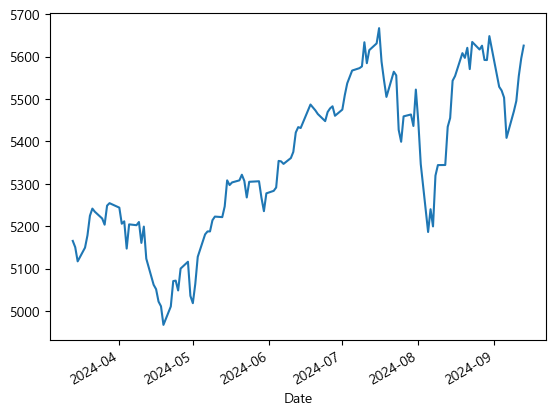

In [27]:
df["Close"].plot()
plt.show()

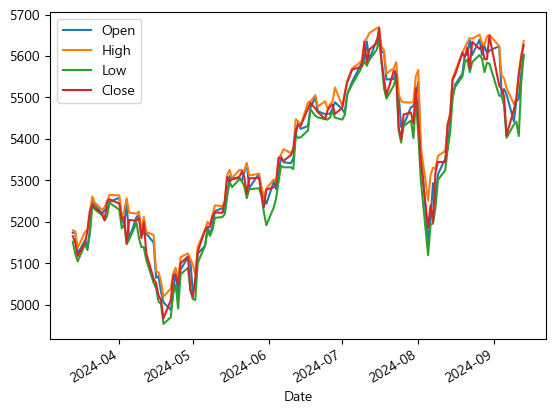

In [28]:
df.plot()
plt.show()

#### 6.2 이동 창(moving window) 함수

df.rolling(): resample()과 유사, 1칸씩 이동하면서 주어진 창 크기만큼 그룹을 생성

```
df.rolling(window,      #계산할 창(window)의 크기
    min_periods=None,   #계산할 최소 크기(기간), 기본적으로 window 크기와 동일
    center=False,       #레이블을 window의 중간에 둘지 여부
    win_type=None,      #가중치를 넣어 계산할 경우 계산 방식
    on=None,            #rolling을 수행할 기준 열
    axis=0,             #계산의 기준이 될 축
    closed=None,        #창 시작과 끝의 포함 여부
    method='single')    #테이블 계산 방식
```

#### 이동평균을 사용하는 이유

이동평균(Moving Average)은 금융 시장에서 가격 데이터의 변동성을 줄이고, 장기적인 추세를 파악하기 위해 주로 사용되는 기술적 분석 도구다. <br>
이동평균을 사용하는 주된 이유는 다음과 같다:

1. **노이즈 감소**: 가격 데이터는 일일 변동성과 단기적인 노이즈가 많기 때문에, 이를 그대로 해석하는 것이 어려울 수 있다. 
 <br>이동평균은 일정 기간 동안의 평균을 계산하여 단기적인 가격 변동의 노이즈를 줄여주고, 더 명확한 추세를 파악할 수 있게 한다.

2. **추세 파악**: 이동평균은 장기적인 가격 움직임을 부드럽게 표현해주기 때문에 상승 또는 하락 추세를 더 쉽게 확인할 수 있다.  <br>
가격이 이동평균 위에 있을 때는 상승 추세로, 아래에 있을 때는 하락 추세로 해석하는 경우가 많다.

3. **지지 및 저항 수준 확인**: 이동평균선은 가격이 멈추거나 반전될 수 있는 잠재적인 지지(하방 지지) 또는 저항(상방 저항) 구간을 제공한다.  <br>
트레이더들은 이를 바탕으로 매수나 매도 시점을 결정하는 데 도움을 받는다.

4. **매매 신호 생성**: 다양한 기간의 이동평균을 함께 사용하여 매매 신호를 생성할 수 있다.  <br>
예를 들어, 단기 이동평균이 장기 이동평균을 상향 돌파할 때는 매수 신호로, 반대로 하향 돌파할 때는 매도 신호로 해석하는 골든크로스와 데드크로스 전략이 있다.

5. **시장 모멘텀 측정**: 이동평균의 기울기를 통해 시장의 모멘텀을 측정할 수 있다.  <br>
이동평균이 가파르게 상승하거나 하락하면 강한 추세를 의미하며, 평평해지면 추세가 약해졌음을 나타낸다.

이동평균은 단순하면서도 강력한 도구로, 주식, 상품, 외환 등 다양한 금융 시장에서 널리 사용된다.  <br>
이를 통해 투자자들은 가격 움직임의 전반적인 흐름을 이해하고, 더 나은 투자 결정을 내릴 수 있다.

**이동 평균 예제**
- rolling(), mean()을 결합

In [29]:
df["Close"].rolling(10).mean()

Date
2024-03-13         NaN
2024-03-14         NaN
2024-03-15         NaN
2024-03-18         NaN
2024-03-19         NaN
                ...   
2024-09-09    5550.706
2024-09-10    5538.574
2024-09-11    5531.407
2024-09-12    5531.765
2024-09-13    5535.171
Name: Close, Length: 128, dtype: float64

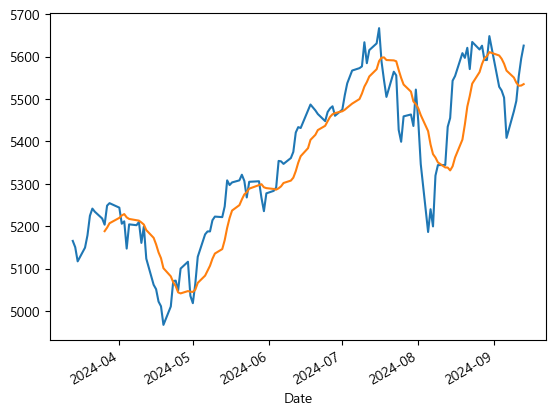

In [30]:
df["Close"].plot()
df["Close"].rolling(10).mean().plot()
plt.show()

#### 6.3 지수 가중 함수
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html
- 균등한 가중치를 사용하는 대신, decay factor를 이용해 최근 값에 더 많은 가중치를 주는 방식
- 단순 이동평균에 비해 변화를 더 빠르게 반영하는 특징이 있음

$y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ... + (1 -
\alpha)^t x_0}{1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^t}$

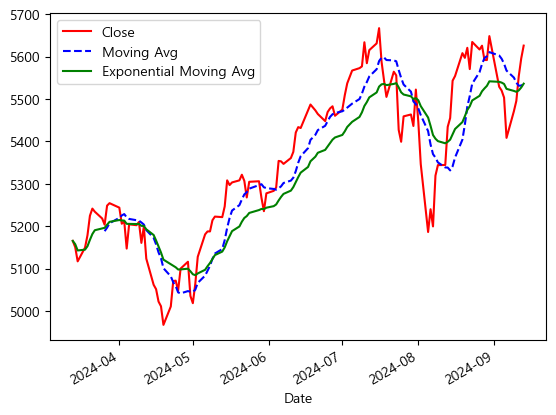

In [31]:
df["Close"].plot(style='r-', label='Close')
df["Close"].rolling(10).mean().plot(style='b--', label='Moving Avg')
df["Close"].ewm(10).mean().plot(style='g-', label='Exponential Moving Avg')
plt.legend()
plt.show()